# Simple Linear regression 
This Notebook contains all code for Simple Linear regression

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

### The problem is simple, given a set of employees and their overall experience in the work force compraed to their salary. We need to calculate how much per year of experience will make each employee using Simple Linear Regression

In [3]:
#Data Preprocessing 
dataset=pd.read_csv('SimpleLinearRegression.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,1].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=1/3,random_state=0)
print(X_train[:])
#We do not need to scale this dataset because Simple Linear Regression already scales all the features

[[  2.9]
 [  5.1]
 [  3.2]
 [  4.5]
 [  8.2]
 [  6.8]
 [  1.3]
 [ 10.5]
 [  3. ]
 [  2.2]
 [  5.9]
 [  6. ]
 [  3.7]
 [  3.2]
 [  9. ]
 [  2. ]
 [  1.1]
 [  7.1]
 [  4.9]
 [  4. ]]


In [5]:
from sklearn .linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
regressor.predict(X_test)

array([  40835.10590871,  123079.39940819,   65134.55626083,
         63265.36777221,  115602.64545369,  108125.8914992 ,
        116537.23969801,   64199.96201652,   76349.68719258,
        100649.1375447 ])

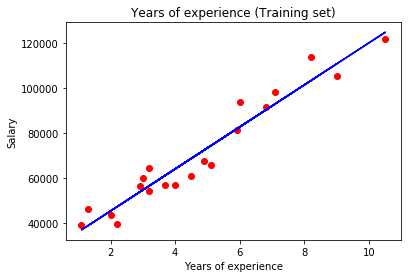

In [8]:
plt.scatter(X_train, Y_train,color="red")
plt.plot(X_train,regressor.predict(X_train),color="blue")
plt.title("Years of experience (Training set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

### The real values are on the red point and the predicted value are on the regression line (for the training site). SInce there is a good linear dependency, we have a good prediction. 

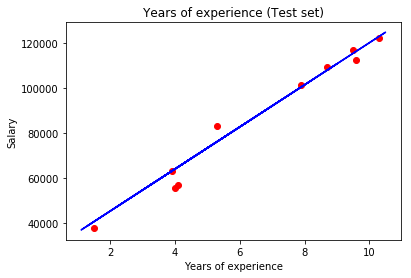

In [9]:
plt.scatter(X_test, Y_test,color="red")
plt.plot(X_train,regressor.predict(X_train),color="blue")
#We are not replacing this because the regressor is trained on the training set, 
#so we will get the same output if we use the test set instead
plt.title("Years of experience (Test set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

### **Verdict** - This is doing a great job in doing some prediction on this dataset. We made a good Simple Linear Regression model 

In [16]:
regressor.coef_

array([ 9345.94244312])

In [14]:
regressor.intercept_

26816.19224403119

In [18]:
regressor.score(X_test,Y_test)*100 #So this model is 97% correct

97.491544077083532

## Understanding fit_intercept in LinearRgression models 
Linear Regression in sklearn has a fit_intercept parameter. This is used to fit the Y intercept. By default it is false 

In [36]:
bias=100
X = np.arange(1000).reshape(-1,1) # We have unknown number of rows but 1 column is needed
y_true = np.ravel(X.dot(0.3) + bias) 

In [37]:
noise = np.random.normal(0, 60, 1000)
#random.normal plots random numbers in normal curve- first parameter is mean, next is variance and third is number of random number 
y = y_true + noise
y[1:10]

array([ 173.81192869,  162.18567572,  189.89551251,   13.54962514,
        174.78514707,   65.94779015,   62.30544522,  136.79779115,
        166.82422001])

In [38]:
#Creating models with both conditions
lr_fi_true = LinearRegression(fit_intercept=True) #default
lr_fi_false = LinearRegression(fit_intercept=False)

In [39]:
lr_fi_true.fit(X, y)
lr_fi_false.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [42]:
print(lr_fi_true.coef_)
print(lr_fi_false.coef_)

[ 0.30068208]
[ 0.45103614]


In [43]:
print(lr_fi_true.intercept_)
print(lr_fi_false.intercept_)
#Just to make things clear here - predicted values are np.dot(X,model.coef_)+mode.intercept_

100.185926418
0.0


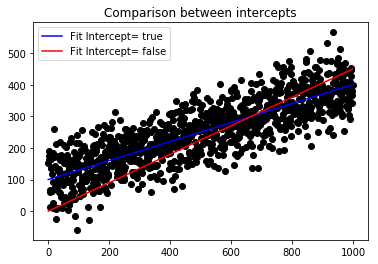

In [51]:
plt.scatter(X,y, color="black")
plt.plot(X,lr_fi_true.predict(X),label="Fit Intercept= true", color="blue")
plt.plot(X,lr_fi_false.predict(X),label="Fit Intercept= false", color="red")
plt.title("Comparison between intercepts")
plt.legend()
plt.show()